<a href="https://colab.research.google.com/github/HRKagdi/Machine-Learning/blob/master/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [0]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [3]:
#Loading the Boston Housing Dataset
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(X.shape)

(506, 13)


In [0]:
#Dividing the dataset into training and test 
x_train=X[0:400,:]
y_train=y[0:400]
x_test=X[400:506,:]
y_test=y[400:506]

In [0]:
sc=StandardScaler()
sc.fit(x_train)
#Normalization
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [6]:
print(x_train.shape)

(400, 13)


In [0]:
#Initailizing the parameters randomly
Theta=np.random.rand(14,1)

In [0]:
#Adding the dummy independent variable
Theta[0]=1

In [9]:
print(Theta)

[[1.        ]
 [0.96920193]
 [0.02741718]
 [0.86368505]
 [0.66497137]
 [0.66257273]
 [0.25856781]
 [0.35644571]
 [0.92321011]
 [0.06365935]
 [0.37351431]
 [0.30428206]
 [0.84691014]
 [0.47380044]]


In [0]:
#Adding the dummy independent variable
x_train=np.insert(x_train,0,1,axis=1)
x_test=np.insert(x_test,0,1,axis=1)

In [0]:
y_train=y_train.reshape(400,1)
y_test=y_test.reshape(106,1)

In [12]:
print(x_train.shape)

(400, 14)


In [0]:
#Cost Function::Mean Square Error
def Cost_function(x_train,y_train,Theta):
    m=x_train.shape[0]
    J_Theta=(1/(2*m))*np.sum(pow((np.dot(x_train,Theta)-y_train),2))
    return J_Theta  

In [0]:
#Gradient Descent Algorithm
def GradientDescent(x_train,y_train,alpha,Theta):
  m=x_train.shape[0]
  J_Theta=Cost_function(x_train,y_train,Theta)
  cost_list=[]
  i=0
  print(J_Theta)
  dict={}
  temp=1000000
  max_iterations=15000
  while(True):
    if(temp-J_Theta<0.00001 and i>max_iterations):
      break
    temp=J_Theta
    J_Theta=Cost_function(x_train,y_train,Theta)    
    Theta=Theta-(1/m)*alpha*(np.dot(x_train.transpose(),np.dot(x_train,Theta)-y_train))
    cost_list.append(J_Theta)
    i+=1
    #print(J_Theta)
  #plt.show
  dict['cost']=J_Theta
  dict['parameters']=Theta
  dict['Error']=cost_list
  dict['No_of_Iter']=i
  return dict

In [15]:
#Displaying the traning error
cost=GradientDescent(x_train,y_train,0.001,Theta)
print(cost['cost'])

325.8490286972807
11.193818087154542


In [18]:
param=cost['parameters']
print(param)

[[ 2.43344929e+01]
 [-1.06788017e+00]
 [ 1.00724636e+00]
 [ 1.47514027e-01]
 [ 5.29731250e-01]
 [-1.45514543e+00]
 [ 3.65195597e+00]
 [ 1.87903541e-02]
 [-2.69407059e+00]
 [ 2.48032016e+00]
 [-1.44427889e+00]
 [-1.72296151e+00]
 [ 5.81916671e-03]
 [-3.49329442e+00]]


In [20]:
test_error=Cost_function(x_test,y_test,param)
print(test_error)

17.399434581576397


<function matplotlib.pyplot.show>

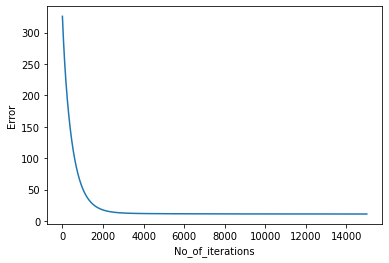

In [21]:
i=cost['No_of_Iter']
iter=np.arange(0,i)
error=cost['Error']
plt.plot(iter,error)
plt.xlabel('No_of_iterations')
plt.ylabel('Error')
plt.show

In [22]:
m=x_test.shape[0]
test_cost=(1/(2*m))*np.sum(pow((np.dot(x_test,param)-y_test),2))
print(test_cost)

17.399434581576397
